<a href="https://colab.research.google.com/github/Jahnavi41/MyInternshipProjects/blob/main/ImageClassificationCIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the dataset
from tensorflow.keras.datasets import cifar10

In [5]:
# split the data into train and test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# checking the shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


<ipython-input-8-d7dee3d91f73>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])  # Convert label to an integer if necessary


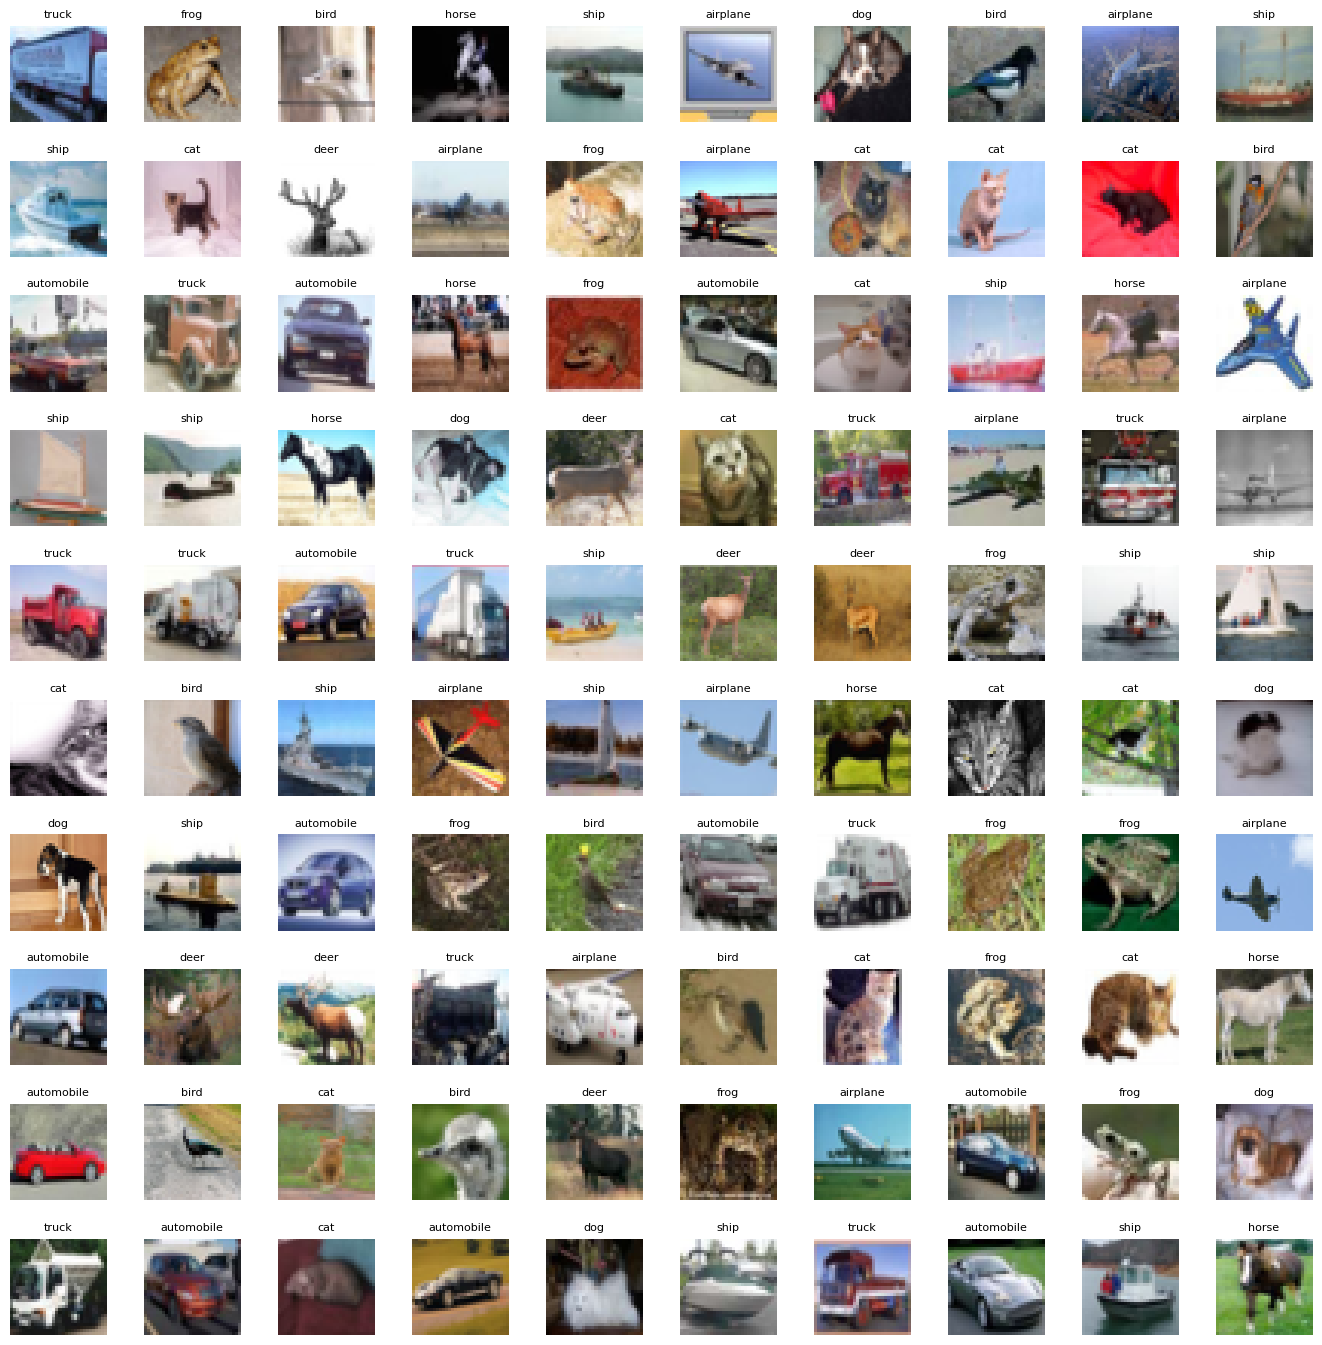

In [8]:
# Define the labels of the dataset
# CIFAR-10 has 10 classes of images. The labels correspond to these classes.
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid (number of rows and columns)
W_grid = 10  # Number of columns in the grid
L_grid = 10  # Number of rows in the grid

# Create a grid of subplots
# 'fig' is the Figure object, 'axes' is a 2D array of Axes objects corresponding to the grid
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

# Flatten the 2D array of Axes objects into a 1D array for easier indexing
axes = axes.ravel()  # Converts the 10x10 array of axes into a 1D array of 100 elements

# Get the total number of images in the training dataset
n_train = len(X_train)  # This variable holds the size of the training dataset

# Loop to randomly select and display images in the grid
for i in np.arange(0, W_grid * L_grid):  # Loop over all grid cells (100 in this case)

    # Select a random index within the range of the training dataset
    index = np.random.randint(0, n_train)  # Random integer between 0 and n_train-1

    # Display the image corresponding to the selected index
    # X_train[index,1:] is the image data at the selected index
    axes[i].imshow(X_train[index])  # Display the image on the current subplot

    # Retrieve the label index for the selected image
    label_index = int(y_train[index])  # Convert label to an integer if necessary

    # Set the title of the current subplot to the label name
    axes[i].set_title(labels[label_index], fontsize=8)  # Add label name with small font size

    # Remove axis markings for a cleaner display
    axes[i].axis('off')

# Adjust the spacing between the subplots for better visibility
plt.subplots_adjust(hspace=0.4)  # Adds space between rows of the grid


In [9]:
# Scale the data
X_train = X_train / 255
X_test = X_test / 255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
# Building the model
kernel_size = (3, 3)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [15]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# The model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,343,018 (5.12 MB)

 Trainable params: 1,342,122 (5.12 MB)

 Non-trainable params: 896 (3.50 KB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [20]:
r = model.fit(train_generator,
              epochs=5,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop]
             )

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4909 - loss: 1.4074 - val_accuracy: 0.6206 - val_loss: 1.0575
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6112 - loss: 1.1014 - val_accuracy: 0.6774 - val_loss: 0.9164
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.6708 - loss: 0.9540 - val_accuracy: 0.6814 - val_loss: 0.9610
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6981 - loss: 0.8777 - val_accuracy: 0.6799 - val_loss: 0.9971
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7279 - loss: 0.7937 - val_accuracy: 0.7746 - val_loss: 0.6621


Text(0.5, 1.0, 'Accuracy evolution')

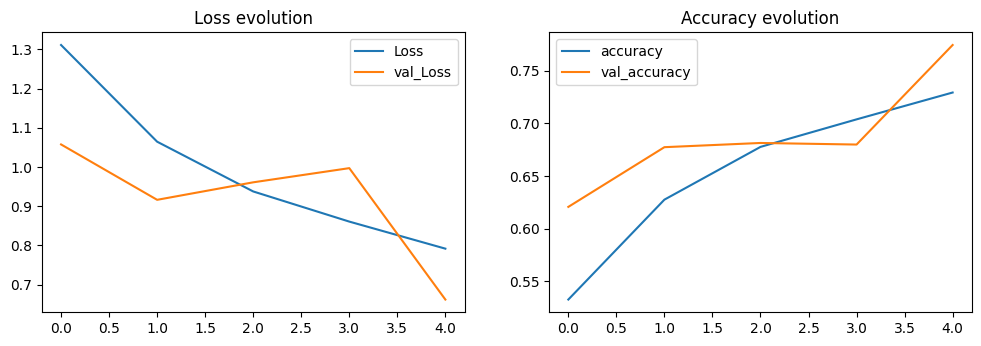

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [22]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7734 - loss: 0.6639
Test Accuracy : 77.46%


In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict the probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels using argmax
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Confusion Matrix:
[[809  13  20  44  23   3   1  18  29  40]
 [ 10 901   1   7   2   1   4   3  11  60]
 [ 85   3 594  73 124  34  57  19   3   8]
 [ 10   4  36 705  65  84  57  24   8   7]
 [  6   2  30  55 829   6  48  21   3   0]
 [  5   2  52 239  53 570  37  35   3   4]
 [  5   2  34  65  20   5 857   5   5   2]
 [ 11   3  15  52  99  28  12 776   1   3]
 [ 73  17   2  33   8   0   3   6 817  41]
 [ 18  50   3  11   3   1   2  17   7 888]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.90      0.90      0.90      1000
           2       0.75      0.59      0.66      1000
           3       0.55      0.70      0.62      1000
           4       0.68      0.83      0.74      1000
           5       0.78      0.57      0.66      1000
           6       0.79      0.86      0.82      1000
           7       0.84      0.78      0.81      100

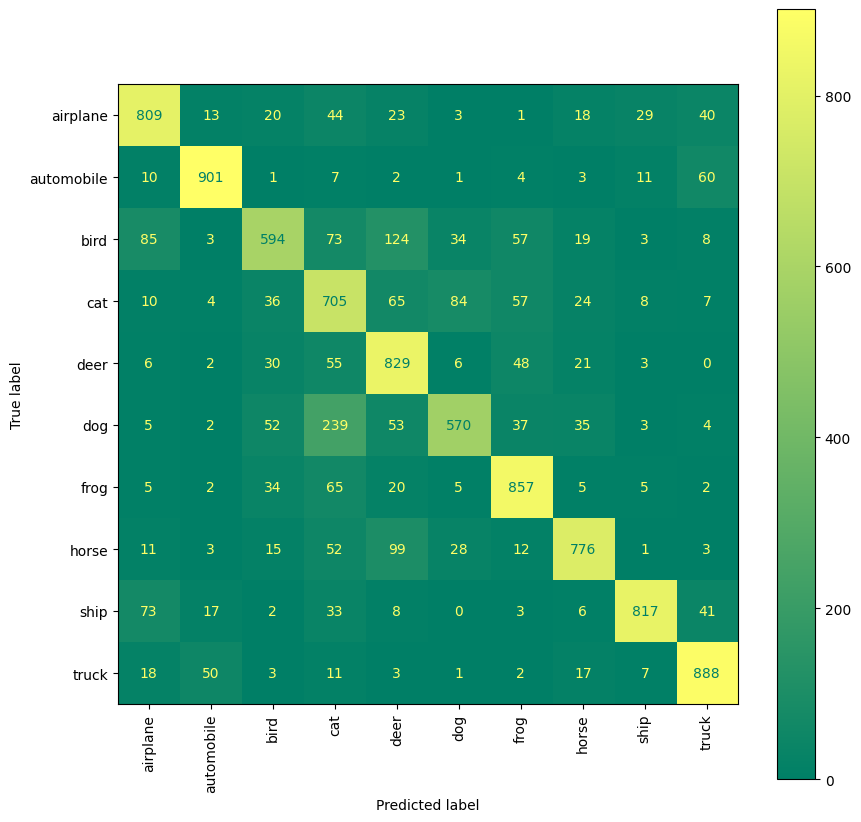

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.90      0.90      0.90      1000
           2       0.75      0.59      0.66      1000
           3       0.55      0.70      0.62      1000
           4       0.68      0.83      0.74      1000
           5       0.78      0.57      0.66      1000
           6       0.79      0.86      0.82      1000
           7       0.84      0.78      0.81      1000
           8       0.92      0.82      0.87      1000
           9       0.84      0.89      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



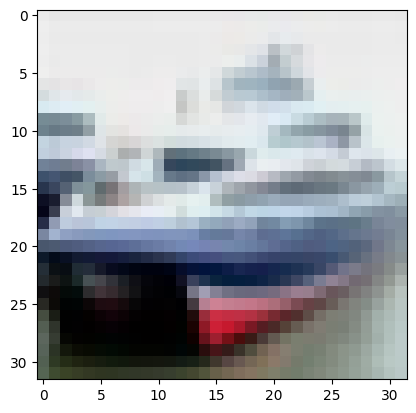

In [34]:
testing_image = X_test[1]
plt.imshow(testing_image)

In [35]:
y_test[1]

array([8], dtype=uint8)

In [36]:
# Reshape the testing image to match the model input shape
testing_image = testing_image.reshape(1, 32, 32, 3)

# Use model.predict to get the probabilities
predictions = model.predict(testing_image)

# Use np.argmax to find the class with the highest probability
predicted_class = np.argmax(predictions)

print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted class is: 8


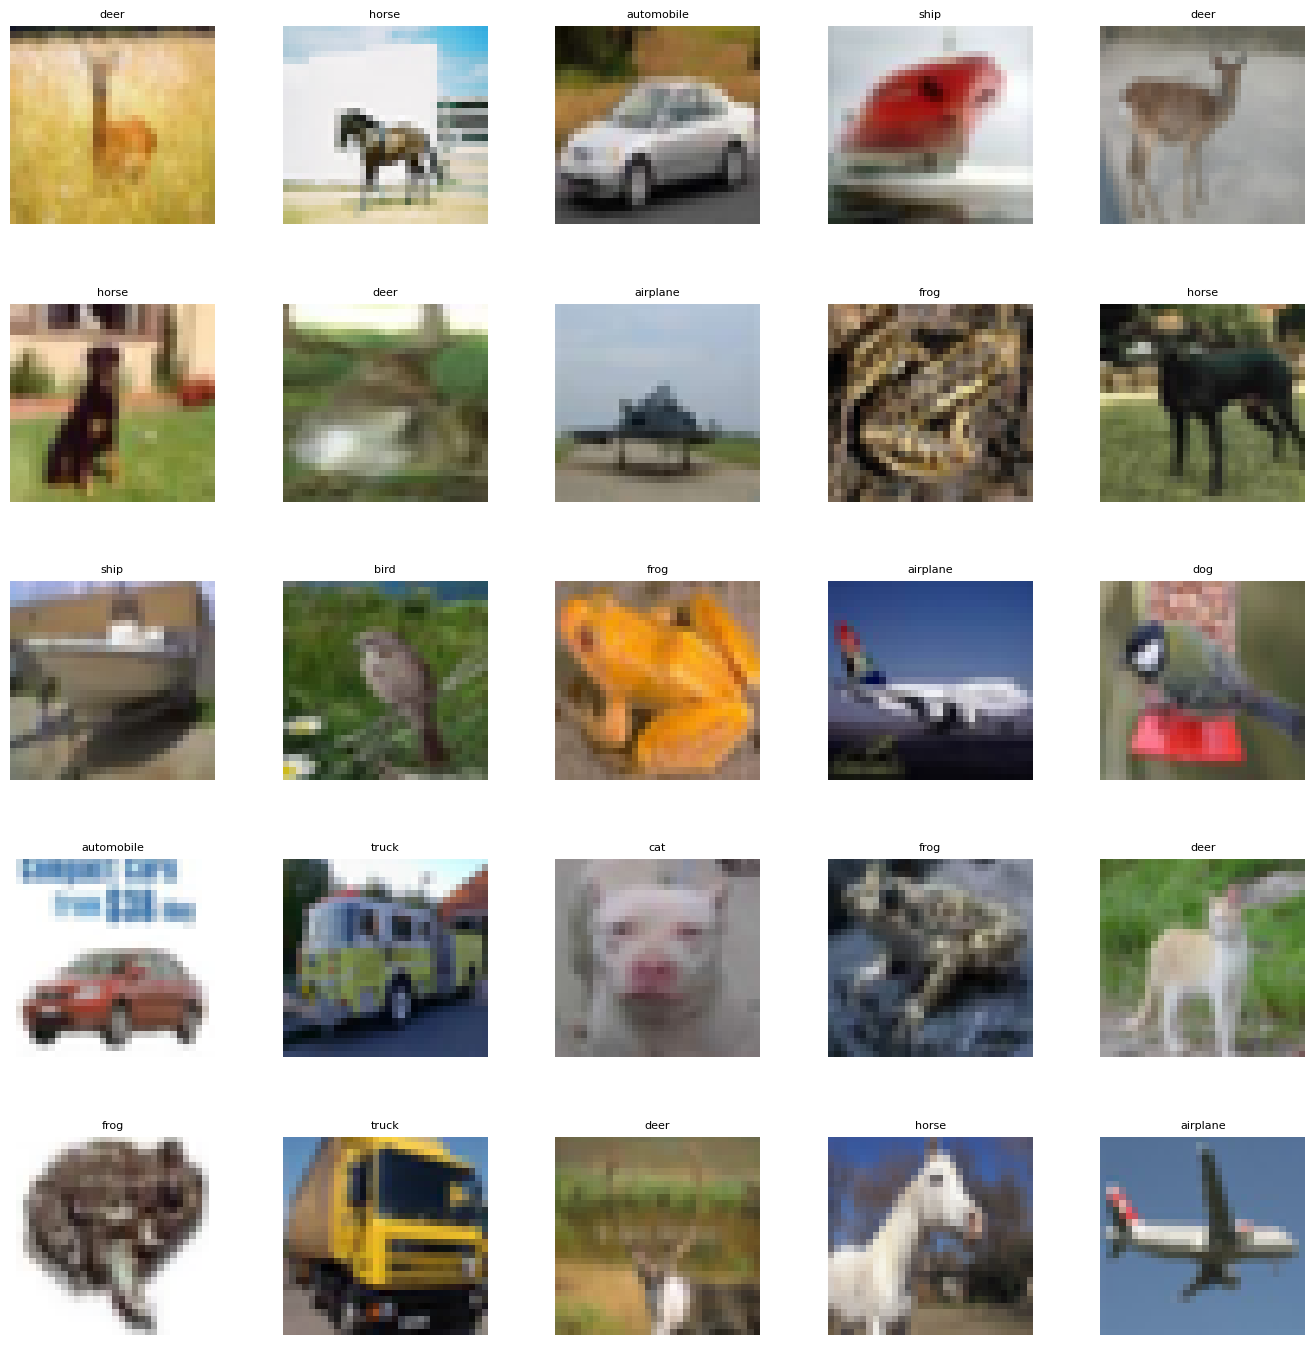

In [37]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [38]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<ipython-input-39-83eb910e855a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-39-83eb910e855a>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


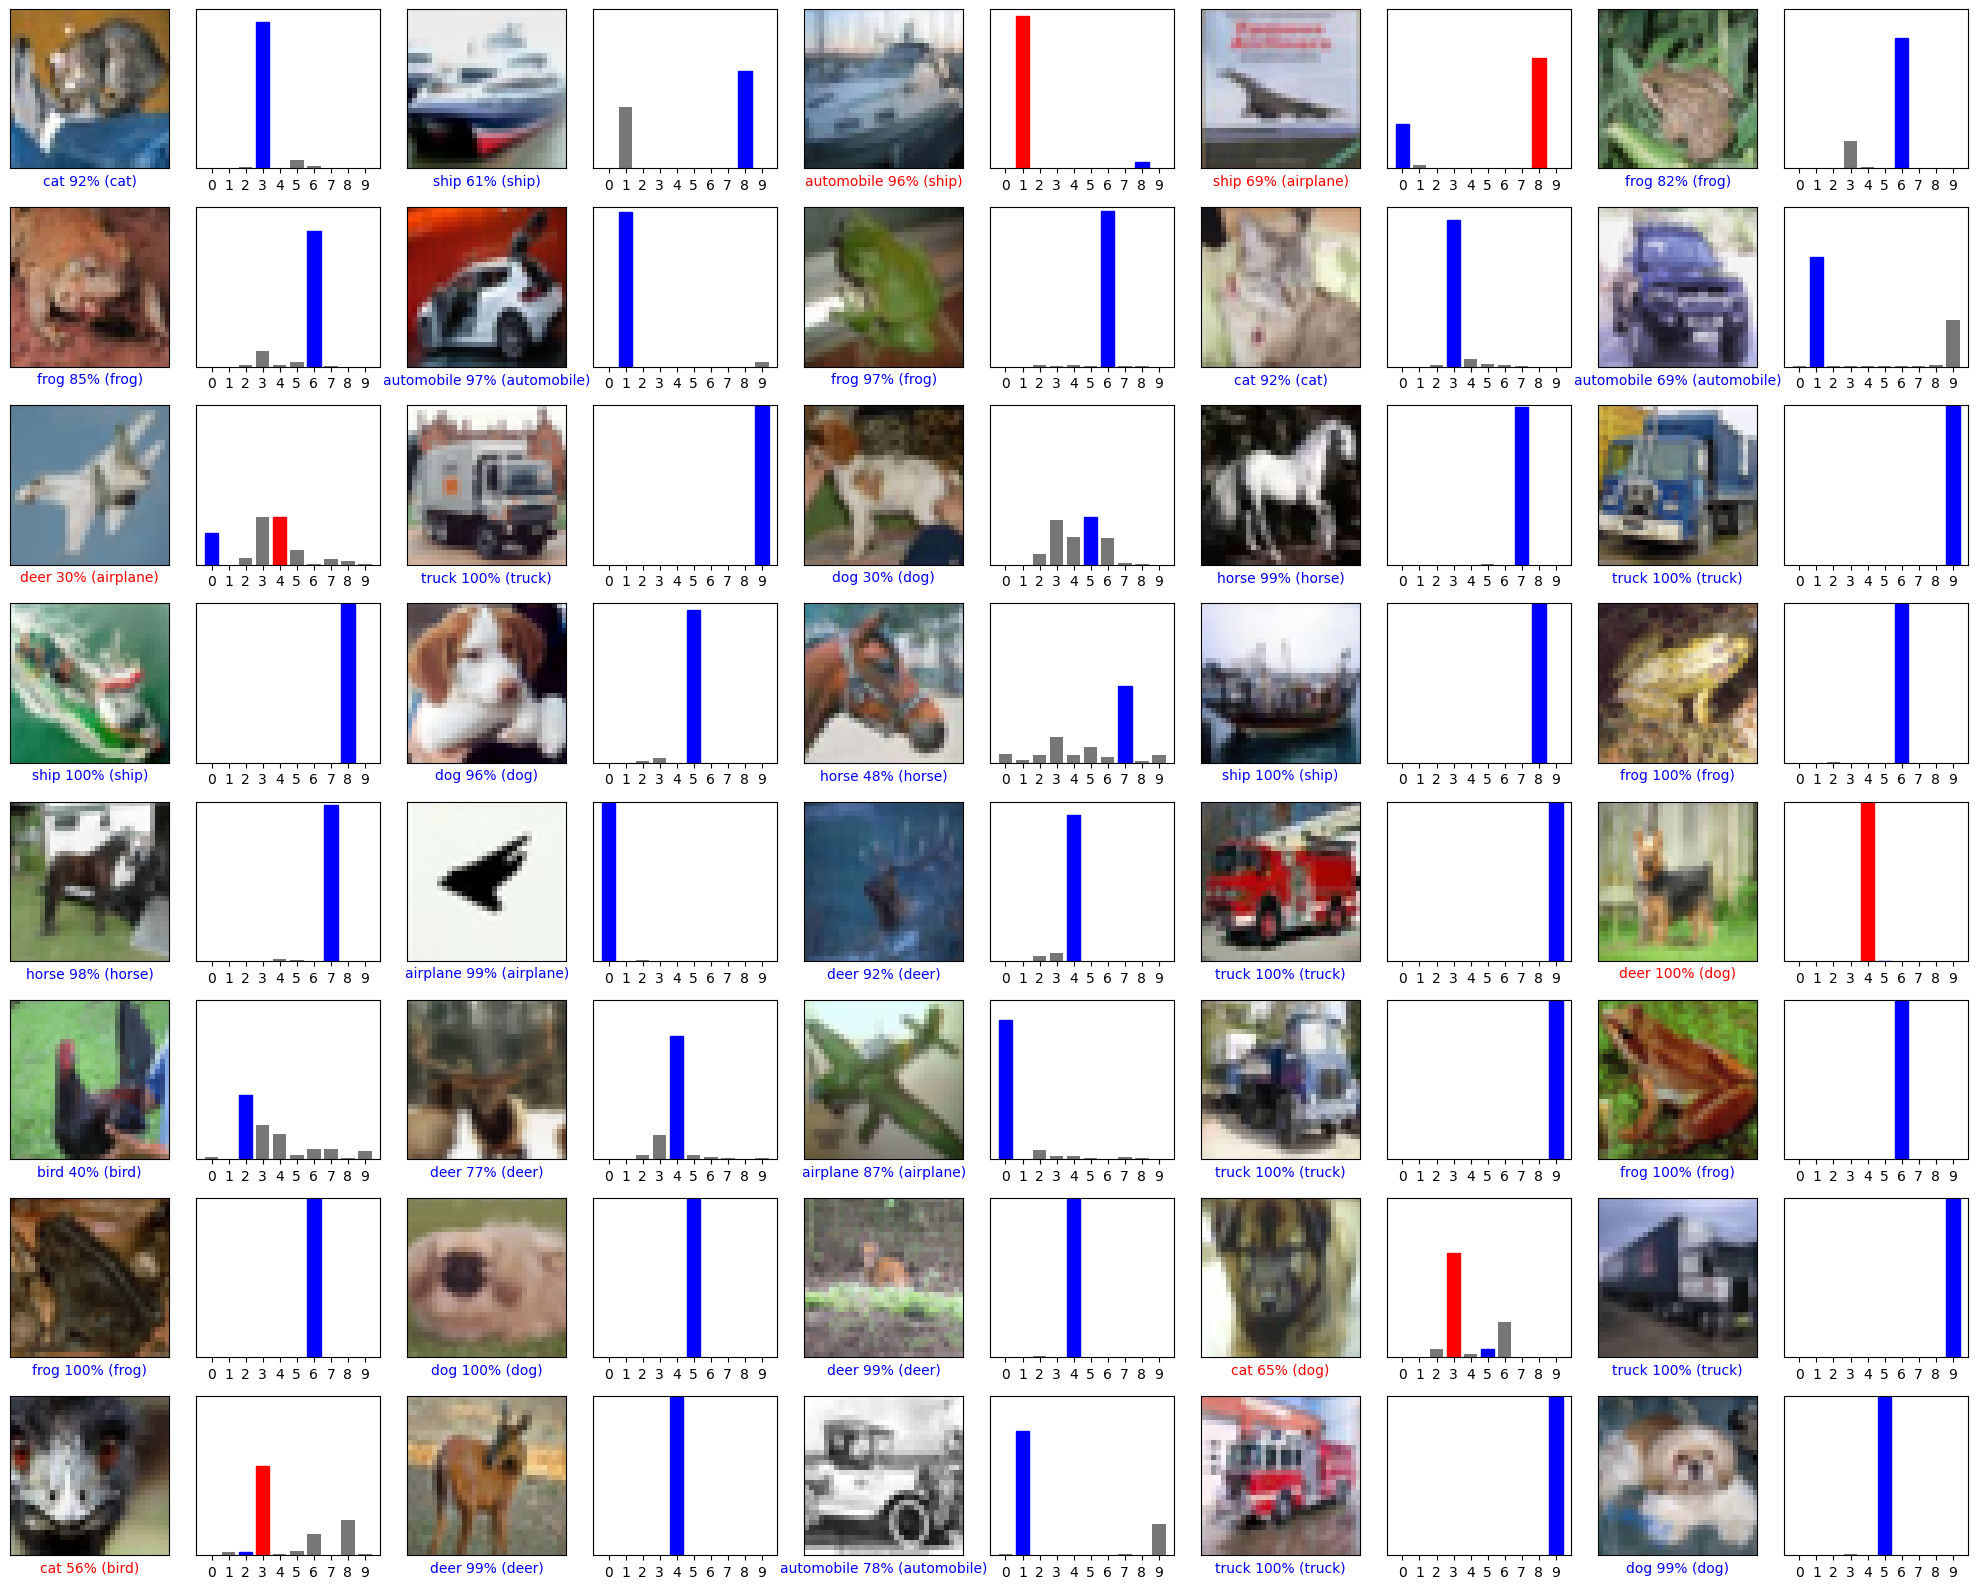

In [40]:
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [42]:
from tensorflow.keras.models import load_model
model.save('cnn_10_epochs.keras')